In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
income = pd.read_csv('income_evaluation.csv')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Number of columns and rows
income.shape

(32561, 15)

In [5]:
# Data type
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Check for missing (null) values
income.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
# Perform summary statistics
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
income.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [9]:
income[' sex'].unique()

array([' Male', ' Female'], dtype=object)

In [10]:
# rename columns name
income.columns = income.columns.str.replace(' ', '')
income.columns = income.columns.str.replace('-', '_')
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
income.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
income.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [13]:
income.drop_duplicates(inplace=True)
income.duplicated().sum()

0

In [14]:
income.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
income.shape

(32537, 15)

In [16]:
# Adding categories to Income
income['income_num'] = np.where(income['income'] == ' >50K', 1, 0).astype('int64')

In [17]:
# Adding categories to Ages
bins = [17 ,20, 30, 40, 50, 60, 70, 80, 90]
labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
income['age_types'] = pd.cut(income['age'], bins=bins, labels=labels)

In [18]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int64   
 1   workclass       32537 non-null  object  
 2   fnlwgt          32537 non-null  int64   
 3   education       32537 non-null  object  
 4   education_num   32537 non-null  int64   
 5   marital_status  32537 non-null  object  
 6   occupation      32537 non-null  object  
 7   relationship    32537 non-null  object  
 8   race            32537 non-null  object  
 9   sex             32537 non-null  object  
 10  capital_gain    32537 non-null  int64   
 11  capital_loss    32537 non-null  int64   
 12  hours_per_week  32537 non-null  int64   
 13  native_country  32537 non-null  object  
 14  income          32537 non-null  object  
 15  income_num      32537 non-null  int64   
 16  age_types       32142 non-null  category
dtypes: category(

In [19]:
# making two lists of columns name
numeric_columns = ['age', 'capital_gain','capital_loss', 'hours_per_week', 'income_num']
categorical = ['workclass', 'education','age_types',  'education_num', 'marital_status','occupation','relationship','race','sex', 'native_country','income']

In [20]:
#changing categorical dtypes
for i in categorical:
    income[i] = income[i].astype("category")
    
display(income.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int64   
 1   workclass       32537 non-null  category
 2   fnlwgt          32537 non-null  int64   
 3   education       32537 non-null  category
 4   education_num   32537 non-null  category
 5   marital_status  32537 non-null  category
 6   occupation      32537 non-null  category
 7   relationship    32537 non-null  category
 8   race            32537 non-null  category
 9   sex             32537 non-null  category
 10  capital_gain    32537 non-null  int64   
 11  capital_loss    32537 non-null  int64   
 12  hours_per_week  32537 non-null  int64   
 13  native_country  32537 non-null  category
 14  income          32537 non-null  category
 15  income_num      32537 non-null  int64   
 16  age_types       32142 non-null  category
dtypes: category(

None

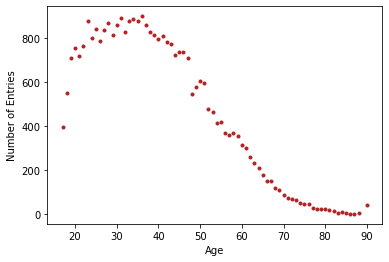

<Figure size 576x1440 with 0 Axes>

In [21]:
income['age'].value_counts().plot(marker='.', linestyle = ' ', color='#B22222')
plt.xlabel('Age')
plt.ylabel('Number of Entries')
plt.figure(figsize=(8,20))
plt.show()

## Age group vs Income

In [22]:
income.groupby('age_types').income.count().reset_index()

,age_types,income
0,17-20,2010
1,21-30,8153
2,31-40,8543
3,41-50,6977
4,51-60,4128
5,61-70,1792
6,71-80,441
7,81-90,98


In [23]:
income.groupby('age_types').income.value_counts().reset_index()


,age_types,level_1,income
0,17-20,<=50K,2008
1,17-20,>50K,2
2,21-30,<=50K,7473
3,21-30,>50K,680
4,31-40,<=50K,6138
5,31-40,>50K,2405
6,41-50,<=50K,4323
7,41-50,>50K,2654
8,51-60,<=50K,2581
9,51-60,>50K,1547


We filter our database by income (`income_num`)

In [24]:
income_less50 = income[income.income_num == 0]
income_less50

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,age_types
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,51-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0,31-40
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,21-30
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,21-30
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,51-60


In [25]:
income_less = income_less50.groupby('age_types').income.count().reset_index()
income_less

,age_types,income
0,17-20,2008
1,21-30,7473
2,31-40,6138
3,41-50,4323
4,51-60,2581
5,61-70,1335
6,71-80,361
7,81-90,84


In [26]:
income_more50 = income[income.income_num == 1]
income_more50

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_num,age_types
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,51-60
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,31-40
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1,41-50
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1,31-40
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,1,71-80
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1,31-40
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1,51-60
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,31-40


In [27]:
income_more = income_more50.groupby('age_types').income.count().reset_index()
income_more

,age_types,income
0,17-20,2
1,21-30,680
2,31-40,2405
3,41-50,2654
4,51-60,1547
5,61-70,457
6,71-80,80
7,81-90,14


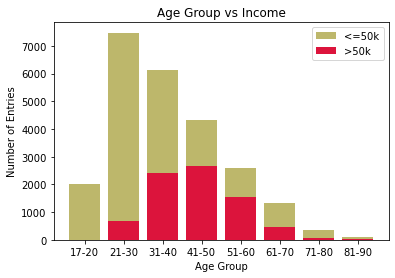

In [28]:
plt.bar(income_less['age_types'], income_less['income'], color='#BDB76B')
plt.bar(income_more['age_types'], income_more['income'], color='#DC143C')
plt.title('Age Group vs Income')
plt.ylabel('Number of Entries')
plt.xlabel('Age Group')
plt.legend(['<=50k', '>50k'])

## Highest level of education distribution

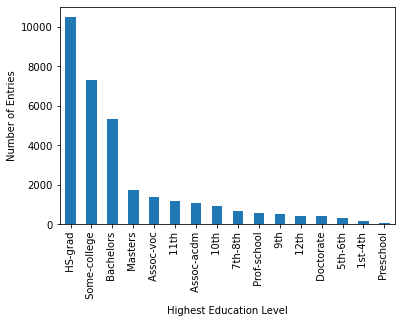

<Figure size 576x1440 with 0 Axes>

In [29]:
income['education'].value_counts().plot(kind='bar')
plt.xlabel('Highest Education Level')
plt.ylabel('Number of Entries')
plt.figure(figsize=(8,20))
plt.show()

In [30]:
income.groupby('education').income.value_counts().reset_index()

,education,level_1,income
0,10th,<=50K,871
1,10th,>50K,62
2,11th,<=50K,1115
3,11th,>50K,60
4,12th,<=50K,400
5,12th,>50K,33
6,1st-4th,<=50K,160
7,1st-4th,>50K,6
8,5th-6th,<=50K,316
9,5th-6th,>50K,16


/var/folders/pt/vndzxn3j6qgfjm0yndf85y8w0000gn/T/ipykernel_93322/2553344173.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(income_less['education'], rotation=90)


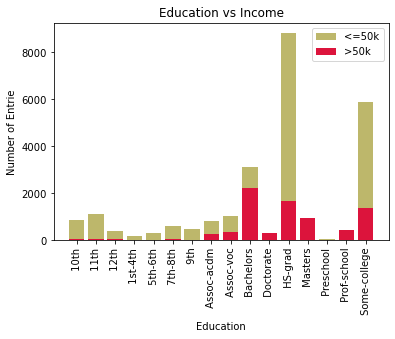

In [31]:
income_less = income_less50.groupby('education').income.count().reset_index()
income_more = income_more50.groupby('education').income.count().reset_index()

plt.bar(income_less['education'], income_less['income'], color='#BDB76B')
plt.bar(income_more['education'], income_more['income'], color='#DC143C')
ax = plt.subplot()
ax.set_xticklabels(income_less['education'], rotation=90)

plt.title('Education vs Income')
plt.ylabel('Number of Entrie')
plt.xlabel('Education')
plt.legend(['<=50k', '>50k'])
plt.show()

## World Class Distribution

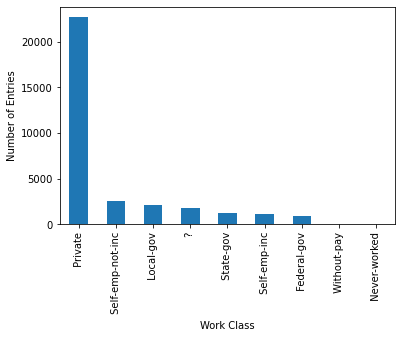

In [33]:
income['workclass'].value_counts().plot(kind='bar')
plt.xlabel('Work Class')
plt.ylabel('Number of Entries')
plt.show()

In [34]:
income.groupby('workclass').income.value_counts().reset_index()

,workclass,level_1,income
0,?,<=50K,1645
1,?,>50K,191
2,Federal-gov,<=50K,589
3,Federal-gov,>50K,371
4,Local-gov,<=50K,1476
5,Local-gov,>50K,617
6,Never-worked,<=50K,7
7,Never-worked,>50K,0
8,Private,<=50K,17712
9,Private,>50K,4961


/var/folders/pt/vndzxn3j6qgfjm0yndf85y8w0000gn/T/ipykernel_93322/3128585714.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(income_less['workclass'], rotation=90)


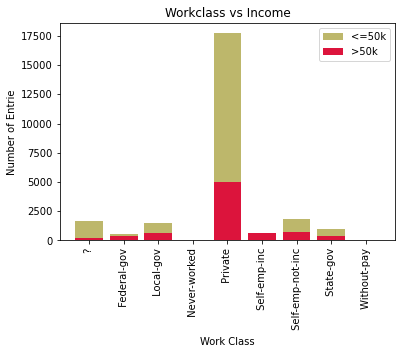

In [36]:
income_less = income_less50.groupby('workclass').income.count().reset_index()
income_more = income_more50.groupby('workclass').income.count().reset_index()

plt.bar(income_less['workclass'], income_less['income'], color='#BDB76B')
plt.bar(income_more['workclass'], income_more['income'], color='#DC143C')
ax = plt.subplot()
ax.set_xticklabels(income_less['workclass'], rotation=90)

plt.title('Workclass vs Income')
plt.ylabel('Number of Entrie')
plt.xlabel('Work Class')
plt.legend(['<=50k', '>50k'])
plt.show()